<a href="https://colab.research.google.com/github/Dushyant2025/amazon-bestselling-books/blob/main/amazon_web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

# Base URL for Amazon
base_url = "https://www.amazon.in/s?k=all+time+bestseller+books&page={i}&crid=X7OXWZX6LB7V&qid=1732119488&sprefix=%2Caps%2C221&ref=sr_pg_{i}"

# base_url="https://www.amazon.com/s?k=bestsellers+books&i=stripbooks-intl-ship&page={i}&crid=13XOO5AKW940D&qid=1732118093&sprefix=bestsellers+books+%2Cstripbooks-intl-ship%2C315&ref=sr_pg_{i}"

# List to store extracted data
data = []

# Headers for HTTP requests to simulate a browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36"
}

# Loop through pages 1 to 20
for i in range(1, 21):
    url = base_url.format(i=i)
    response = requests.get(url, headers=headers)

    # Check the status code
    print(f"Fetching URL {i}: {url} (Status Code: {response.status_code})")

    # Parse the page only if the request was successful
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")

        # Find all product containers
        products = soup.find_all("div", {"data-component-type": "s-search-result"})

        for product in products:
            try:
                # Extract Title
                title_tag = product.find("span", class_="a-size-medium a-color-base a-text-normal")
                title = title_tag.text if title_tag else None

                # Extract Price
                price_tag = product.find("span", class_="a-price-whole")
                price = price_tag.text if price_tag else None

                # Extract Cover Type
                cover_type_tag = product.find("a", class_="a-size-base a-link-normal s-underline-text s-underline-link-text s-link-style a-text-bold")
                cover_type = cover_type_tag.text if cover_type_tag else None

                # Extract Author and Date
                author_tag = product.find("a", class_="a-size-base a-link-normal s-underline-text s-underline-link-text s-link-style")
                author = author_tag.text if author_tag else None
                date_tag = product.find("span", class_="a-size-base a-color-secondary a-text-normal")
                date = date_tag.text if date_tag else None

                # Extract Rating
                rating_tag = product.find("span", {"aria-label": re.compile(r"out of 5 stars")})
                rating = rating_tag["aria-label"].split(" ")[0] if rating_tag else None

                # Extract Number of Reviews
                reviews_tag = product.find("span", {"aria-label": re.compile(r"ratings")})
                reviews = reviews_tag.text.replace(",", "") if reviews_tag else None

                # Extract Rank (Optional and may require modification based on observation)
                rank = product.get("data-index") if product.has_attr("data-index") else None



                # Append data to the list
                data.append({
                    "Rank": rank,
                    "Title": title,
                    "Author": author,
                    "Rating": rating,
                    "Number of Reviews": reviews,
                    "Cover Type": cover_type,
                    "Date": date,
                    "Price": price,

                })
            except Exception as e:
                print(f"Error parsing product: {e}")




Fetching URL 1: https://www.amazon.in/s?k=all+time+bestseller+books&page=1&crid=X7OXWZX6LB7V&qid=1732119488&sprefix=%2Caps%2C221&ref=sr_pg_1 (Status Code: 200)
Fetching URL 2: https://www.amazon.in/s?k=all+time+bestseller+books&page=2&crid=X7OXWZX6LB7V&qid=1732119488&sprefix=%2Caps%2C221&ref=sr_pg_2 (Status Code: 200)
Fetching URL 3: https://www.amazon.in/s?k=all+time+bestseller+books&page=3&crid=X7OXWZX6LB7V&qid=1732119488&sprefix=%2Caps%2C221&ref=sr_pg_3 (Status Code: 200)
Fetching URL 4: https://www.amazon.in/s?k=all+time+bestseller+books&page=4&crid=X7OXWZX6LB7V&qid=1732119488&sprefix=%2Caps%2C221&ref=sr_pg_4 (Status Code: 200)
Fetching URL 5: https://www.amazon.in/s?k=all+time+bestseller+books&page=5&crid=X7OXWZX6LB7V&qid=1732119488&sprefix=%2Caps%2C221&ref=sr_pg_5 (Status Code: 200)
Fetching URL 6: https://www.amazon.in/s?k=all+time+bestseller+books&page=6&crid=X7OXWZX6LB7V&qid=1732119488&sprefix=%2Caps%2C221&ref=sr_pg_6 (Status Code: 200)
Fetching URL 7: https://www.amazon.in/s?

In [ ]:
# Create a DataFrame from the scraped data
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


    Rank                                              Title  \
0      2       Don't Believe Everything You Think (English)   
1      3  The Power of Your Subconscious Mind: Original ...   
2      4                                      Atomic Habits   
3      6                            The Psychology of Money   
4      7  I Don't Love You Anymore: Moving On and Living...   
..   ...                                                ...   
307    6  She Gets the Girl: TikTok made me buy it! The ...   
308    7                Autobiography of A Yogi (Malayalam)   
309    8                          As A Man Thinketh (Tamil)   
310   12  How to Stop Worrying and Start Living by Dale ...   
311   13  The Power of Your Subconscious Mind [Original ...   

                    Author Rating Number of Reviews      Cover Type  \
0            Joseph Nguyen    4.5            8247         Paperback   
1            Joseph Murphy    4.4           13452         Paperback   
2              James Clear    

In [ ]:

# Save the data to a CSV file
df.to_csv("amazon_books_rr.csv", index=False)

print("Scraping complete. Data saved to 'amazon_books.csv'.")

Scraping complete. Data saved to 'amazon_books.csv'.


In [ ]:
df.shape

(312, 8)

In [2]:
df.head()

,Rank,Title,Author,Rating,Number of Reviews,Cover Type,Date,Price
0,1,Don't Believe Everything You Think (English),Joseph Nguyen,4.5,8256,Paperback,25 November 2022,235
1,2,Atomic Habits,James Clear,4.6,98803,Paperback,30 October 2018,549
2,3,The Power of Your Subconscious Mind: Original ...,Joseph Murphy,4.4,13457,Paperback,12 October 2020,149
3,4,The Psychology of Money,Morgan Housel,4.6,67673,Paperback,18 September 2020,312
4,5,I Don't Love You Anymore: Moving On and Living...,Rithvik Singh,4.1,740,Paperback,14 May 2024,204


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import datetime

In [41]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
from nltk.corpus import stopwords

# Example Usage
stop_words = set(stopwords.words('english'))
print(f"Stopwords: {list(stop_words)[:10]}")


Stopwords: ['between', "mustn't", "you'd", 'you', 'aren', 'but', 'what', "aren't", 'where', 'himself']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rank               48 non-null     int64 
 1   Title              48 non-null     object
 2   Author             45 non-null     object
 3   Rating             47 non-null     object
 4   Number of Reviews  47 non-null     object
 5   Cover Type         48 non-null     object
 6   Date               48 non-null     object
 7   Price              48 non-null     object
dtypes: int64(1), object(7)
memory usage: 3.1+ KB


In [6]:
df.isna().sum()

,0
Rank,0
Title,0
Author,3
Rating,1
Number of Reviews,1
Cover Type,0
Date,0
Price,0


In [7]:
df.duplicated().sum()

0

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d %B %Y', errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [10]:
df.dropna(inplace=True)

In [16]:
df['Price'].describe()

,Price
count,43.000000
mean,321.139535
std,172.402296
min,117.000000
25%,205.500000
50%,274.000000
75%,355.000000
max,925.000000


In [13]:
df['Rating'].describe()

,Rating
count,43
unique,9
top,4.5
freq,14


In [15]:
df["Number of Reviews"].describe()

,Number of Reviews
count,43
unique,41
top,197159
freq,2


In [17]:
top_authors = df['Author'].value_counts().head(10)
print("Top Authors:\n", top_authors)

Top Authors:
 Author
Joseph Murphy                    2
Fredrik Backman                  2
Thibaut Meurisse                 2
The Housemaid Freida McFadden    2
Colleen Hoover                   2
Gaur Gopal Das                   2
Morgan Housel                    1
James Clear                      1
Joseph Nguyen                    1
Rithvik Singh                    1
Name: count, dtype: int64


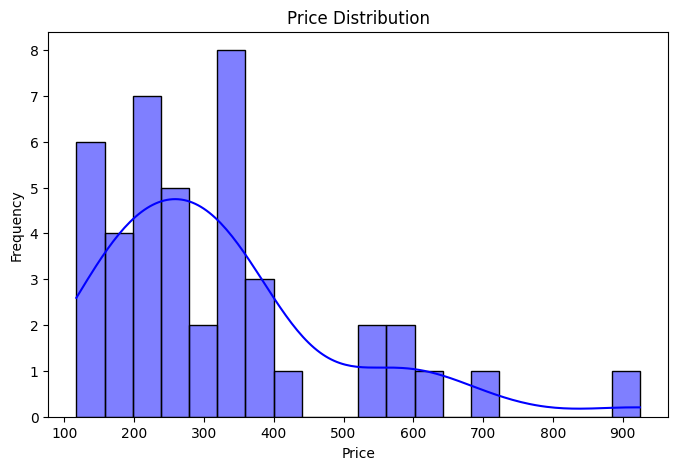

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True, bins=20, color='blue')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

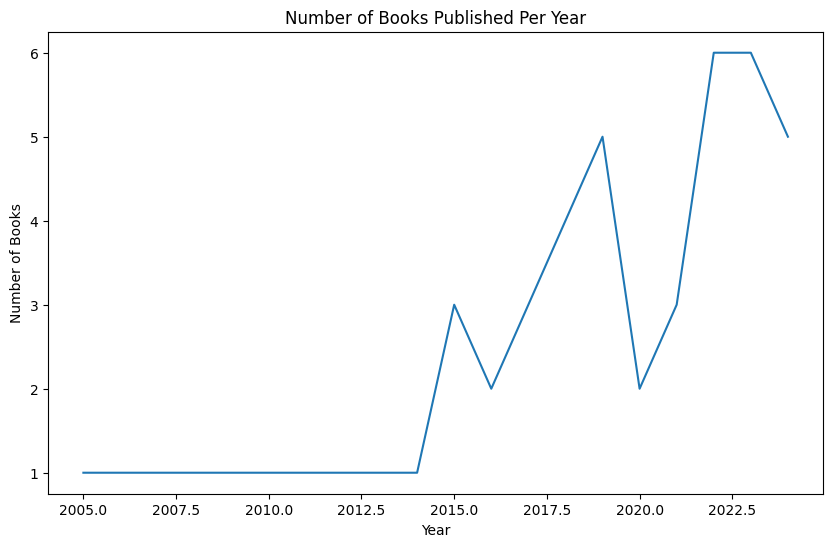

In [24]:
# Trend Analysis
df['Year'] = df['Date'].dt.year
yearly_books = df.groupby('Year').size()
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_books.index, y=yearly_books.values)
plt.title("Number of Books Published Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Books")
plt.show()

In [26]:
# Review Insights
top_reviews = df.nlargest(10, 'Number of Reviews')
bottom_reviews = df.nsmallest(10, 'Number of Reviews')
print("Top 10 Reviewed Books:\n", top_reviews[['Title', 'Number of Reviews']])
print("Bottom 10 Reviewed Books:\n", bottom_reviews[['Title', 'Number of Reviews']])

TypeError: Column 'Number of Reviews' has dtype object, cannot use method 'nlargest' with this dtype

In [28]:
df['Number of Reviews'] = pd.to_numeric(df['Number of Reviews'], errors='coerce')

In [29]:
# Review Insights
top_reviews = df.nlargest(10, 'Number of Reviews')
bottom_reviews = df.nsmallest(10, 'Number of Reviews')

print("Top 10 Reviewed Books:\n", top_reviews[['Title', 'Number of Reviews']])
print("Bottom 10 Reviewed Books:\n", bottom_reviews[['Title', 'Number of Reviews']])


Top 10 Reviewed Books:
                                                 Title  Number of Reviews
26  Kunex It Ends With Us : ''Sometimes The One Wh...             343419
5                  VERITY [Paperback] Hoover, Colleen             306442
10  Never Lie : A Totally Gripping Thriller with M...             197159
17  Never Lie : A Totally Gripping Thriller with M...             197159
16                                   A Man Called Ove             180367
8   Sapiens: A Brief History of Humankind: The mul...             120701
21                                      The Alchemist             113717
1                                       Atomic Habits              98803
43            Pachinko: The New York Times Bestseller              75735
14                                     Anxious People              71567
Bottom 10 Reviewed Books:
                                                 Title  Number of Reviews
40           The Mother Of All Baby Books 3rd Edition                 36


<ipython-input-30-e4e536f3dc41>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_reviews, x='Number of Reviews', y='Title', palette='viridis')


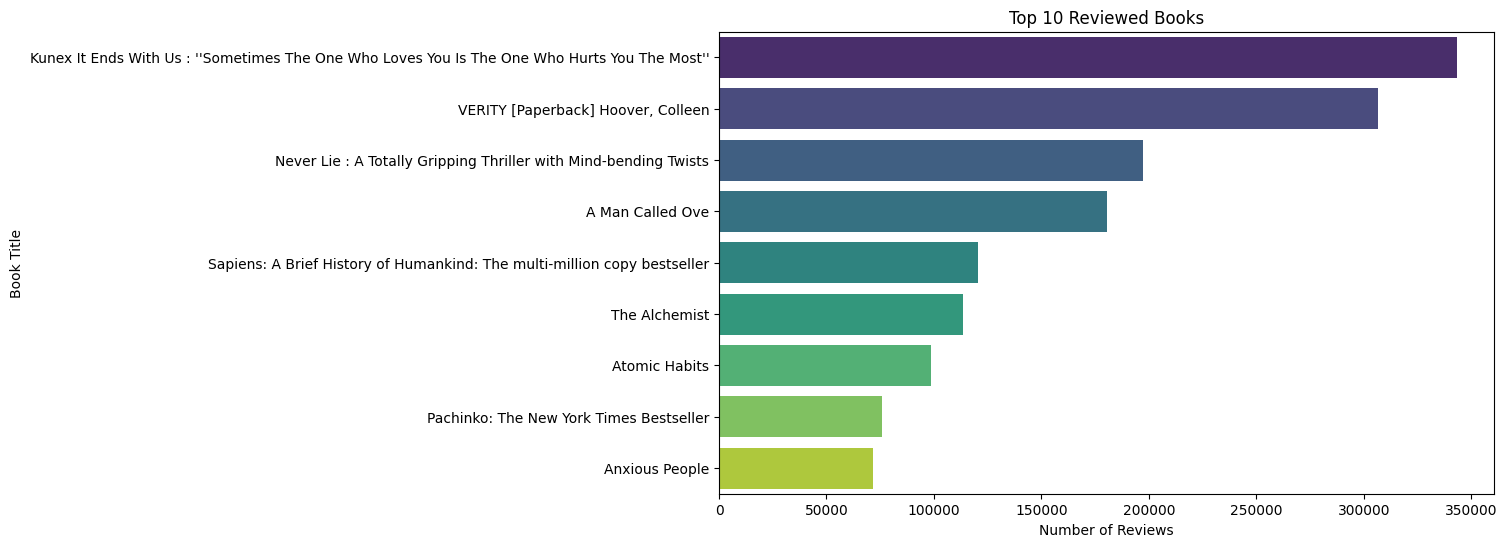

<ipython-input-30-e4e536f3dc41>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_reviews, x='Number of Reviews', y='Title', palette='mako')


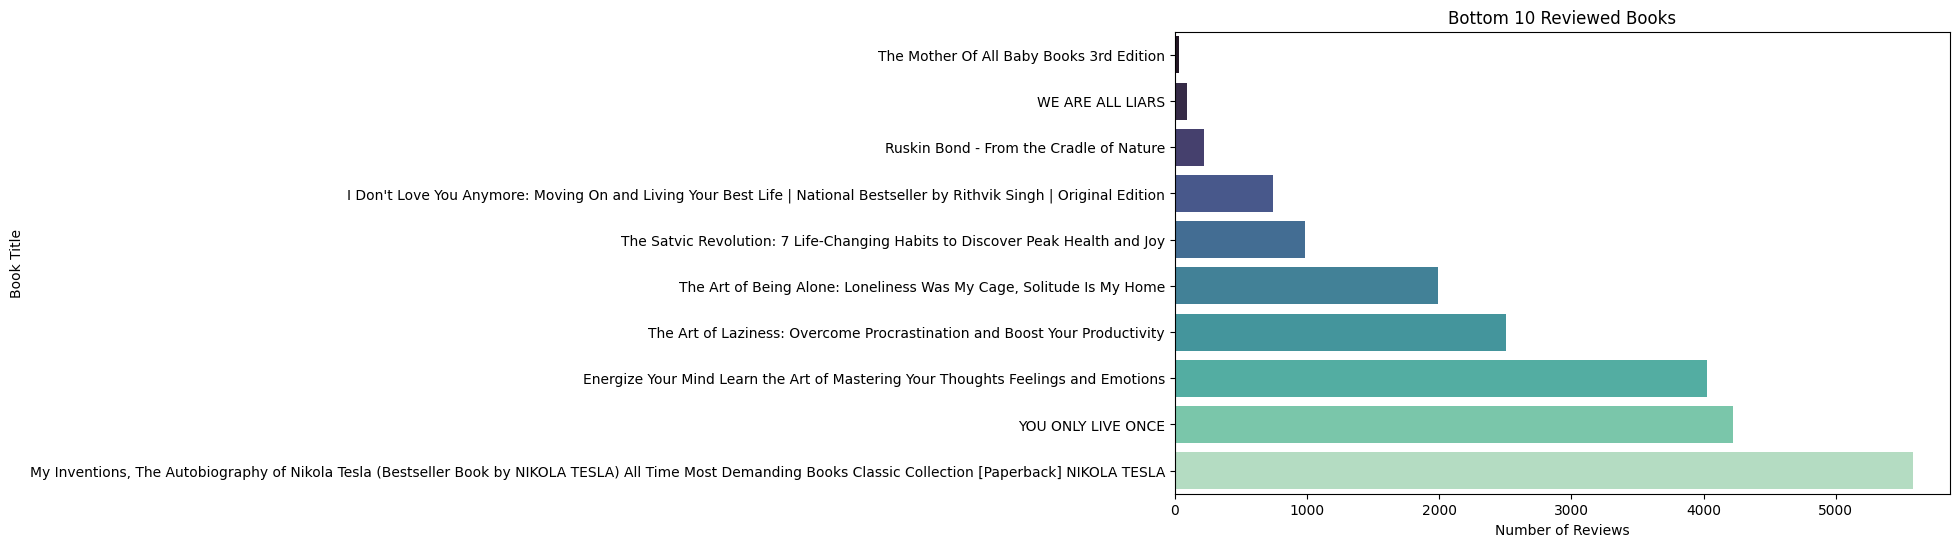

In [30]:
# Top 10 Reviewed Books
plt.figure(figsize=(10, 6))
sns.barplot(data=top_reviews, x='Number of Reviews', y='Title', palette='viridis')
plt.title('Top 10 Reviewed Books')
plt.xlabel('Number of Reviews')
plt.ylabel('Book Title')
plt.show()

# Bottom 10 Reviewed Books
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_reviews, x='Number of Reviews', y='Title', palette='mako')
plt.title('Bottom 10 Reviewed Books')
plt.xlabel('Number of Reviews')
plt.ylabel('Book Title')
plt.show()

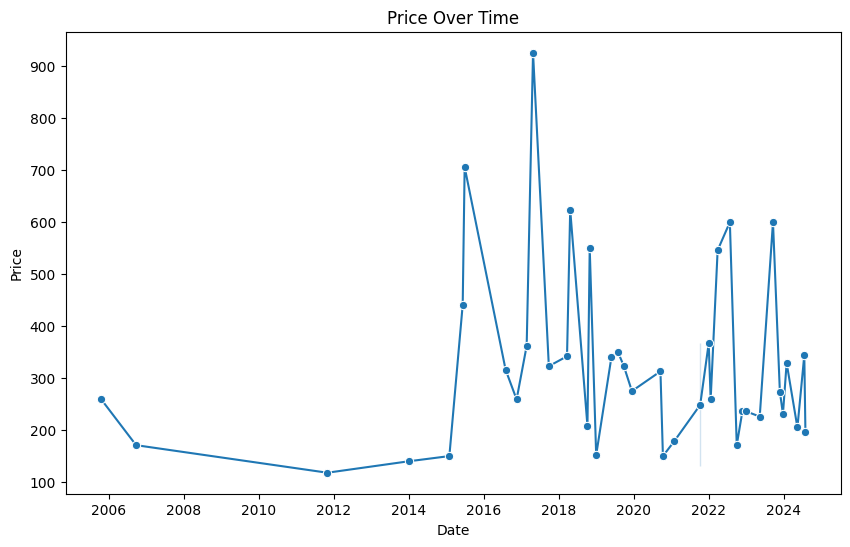

In [31]:
## Price Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Price', marker='o')
plt.title("Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [33]:
# Rating Trends
print(df['Rating'].unique())


['4.5' '4.6' '4.4' '4.1' '4.3' '4.8' '4.7' '4.0' '3.8']


In [34]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [35]:
average_rating = df['Rating'].mean()
print(f"Average Rating: {average_rating}")

Average Rating: 4.448837209302327


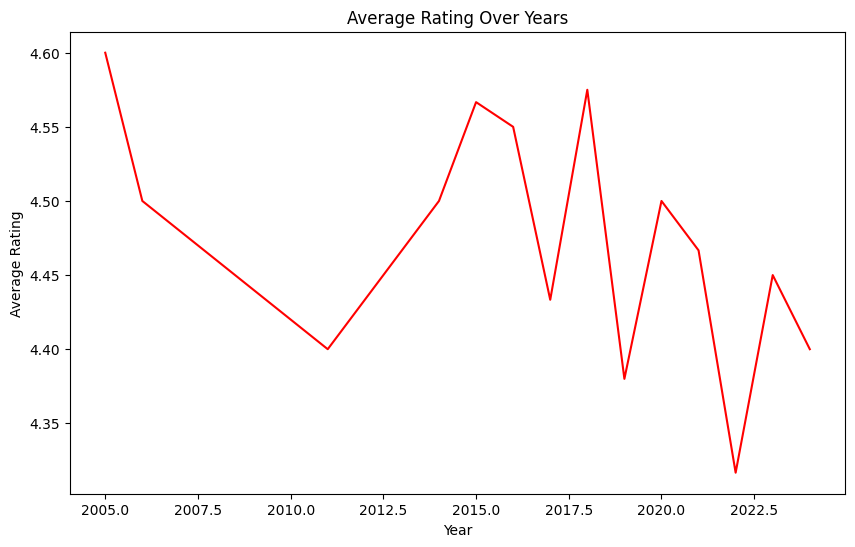

In [36]:
# Rating Trends
rating_trends = df.groupby('Year')['Rating'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=rating_trends.index, y=rating_trends.values, color='red')
plt.title("Average Rating Over Years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()

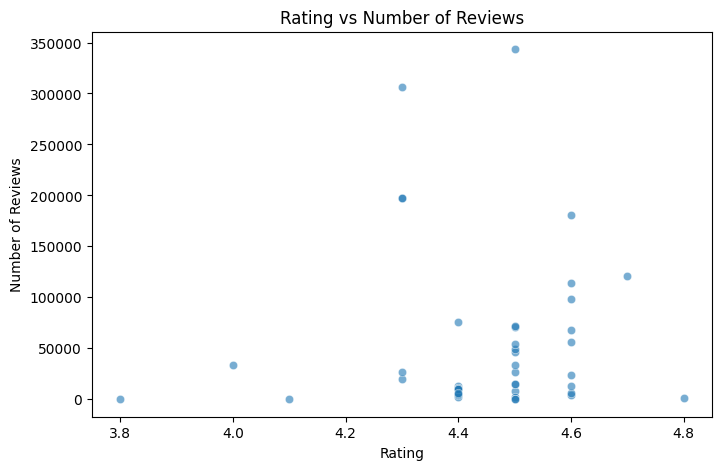

In [37]:
# Rating vs Reviews
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Rating', y='Number of Reviews', alpha=0.6)
plt.title("Rating vs Number of Reviews")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

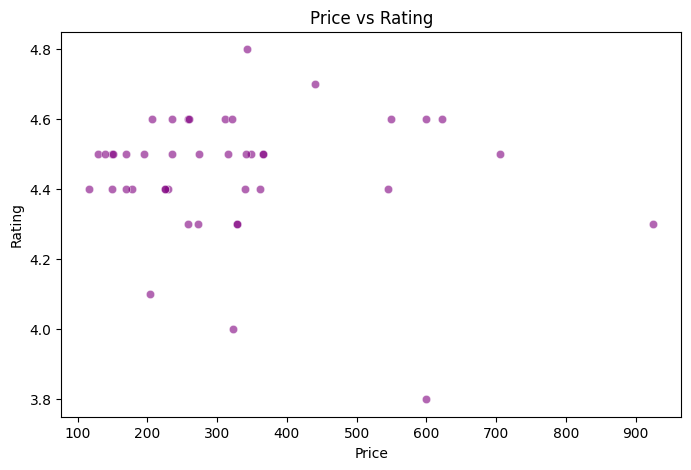

In [38]:
# Price vs Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Price', y='Rating', alpha=0.6, color='purple')
plt.title("Price vs Rating")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()

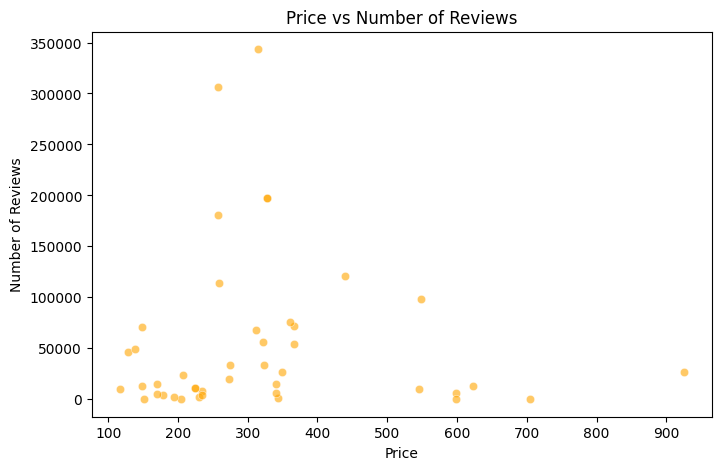

In [39]:
# Price vs Reviews
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Price', y='Number of Reviews', alpha=0.6, color='orange')
plt.title("Price vs Number of Reviews")
plt.xlabel("Price")
plt.ylabel("Number of Reviews")
plt.show()

In [45]:
format_analysis = df.groupby('Cover Type')[['Rating', 'Price', 'Number of Reviews']].mean()
print("Format Analysis:\n", format_analysis)

Format Analysis:
                   Rating       Price  Number of Reviews
Cover Type                                             
Hardcover       4.566667  428.666667       28326.000000
Kindle Edition  4.400000  361.000000       75735.000000
Paperback       4.441026  311.846154       56281.333333


In [46]:
# Author Popularity
author_popularity = df.groupby('Author')[['Rating', 'Number of Reviews']].mean().sort_values('Number of Reviews', ascending=False).head(10)
print("Top 10 Authors by Reviews:\n", author_popularity)

Top 10 Authors by Reviews:
                                Rating  Number of Reviews
Author                                                  
Colleen Hoover                   4.40           324930.5
The Housemaid Freida McFadden    4.30           197159.0
Fredrik Backman                  4.55           125967.0
Yuval Noah Harari                4.70           120701.0
Paulo Coelho                     4.60           113717.0
James Clear                      4.60            98803.0
Min Jin Lee                      4.40            75735.0
Morgan Housel                    4.60            67673.0
Francesc Miralles                4.60            56509.0
Tillie Cole                      4.50            54611.0


In [47]:
# Financial Insights
df['Revenue Estimate'] = df['Price'] * df['Number of Reviews']
top_revenue_books = df.nlargest(10, 'Revenue Estimate')
print("Top Revenue-Generating Books:\n", top_revenue_books[['Title', 'Revenue Estimate']])

Top Revenue-Generating Books:
                                                 Title  Revenue Estimate
26  Kunex It Ends With Us : ''Sometimes The One Wh...       108176985.0
5                  VERITY [Paperback] Hoover, Colleen        79062036.0
10  Never Lie : A Totally Gripping Thriller with M...        64668152.0
17  Never Lie : A Totally Gripping Thriller with M...        64668152.0
1                                       Atomic Habits        54242847.0
8   Sapiens: A Brief History of Humankind: The mul...        53108440.0
16                                   A Man Called Ove        46534686.0
21                                      The Alchemist        29452703.0
43            Pachinko: The New York Times Bestseller        27340335.0
14                                     Anxious People        26193522.0


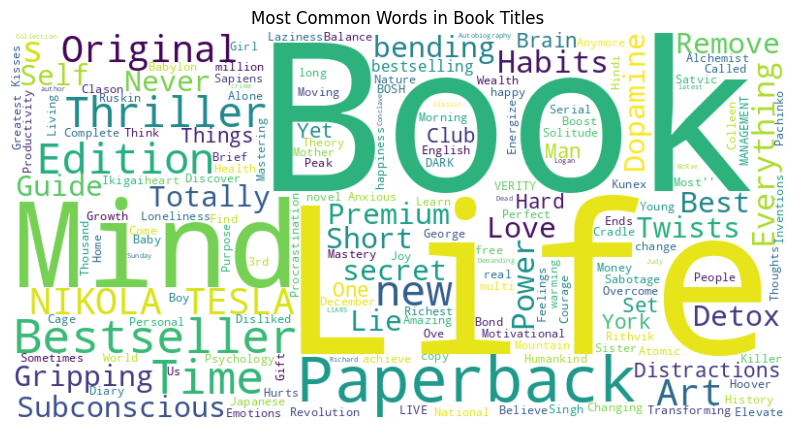

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# the most common words in book titles
text = ' '.join(df['Title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Book Titles')
plt.show()


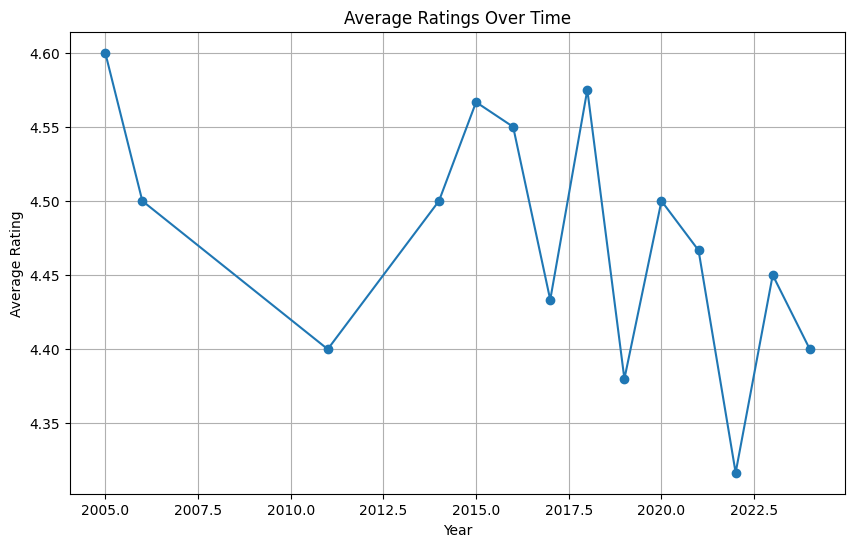

In [50]:
# Explore trends in book ratings by year of publication
df['Year'] = pd.to_datetime(df['Date'], errors='coerce').dt.year
avg_ratings_yearly = df.groupby('Year')['Rating'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_ratings_yearly, marker='o')
plt.title('Average Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid()
plt.show()


                      Price    Rating  Number of Reviews
Price              1.000000 -0.082183          -0.025026
Rating            -0.082183  1.000000           0.033113
Number of Reviews -0.025026  0.033113           1.000000


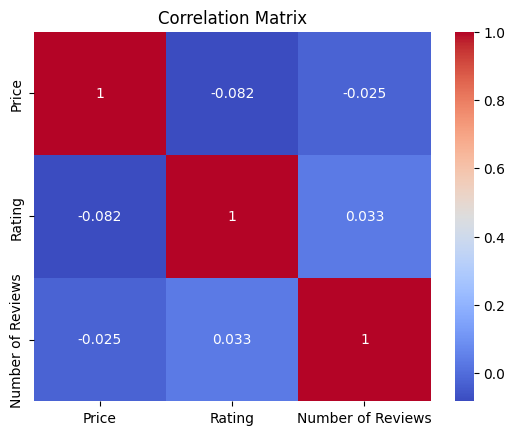

In [51]:
# correlations between Price and other columns
corr_matrix = df[['Price', 'Rating', 'Number of Reviews']].corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


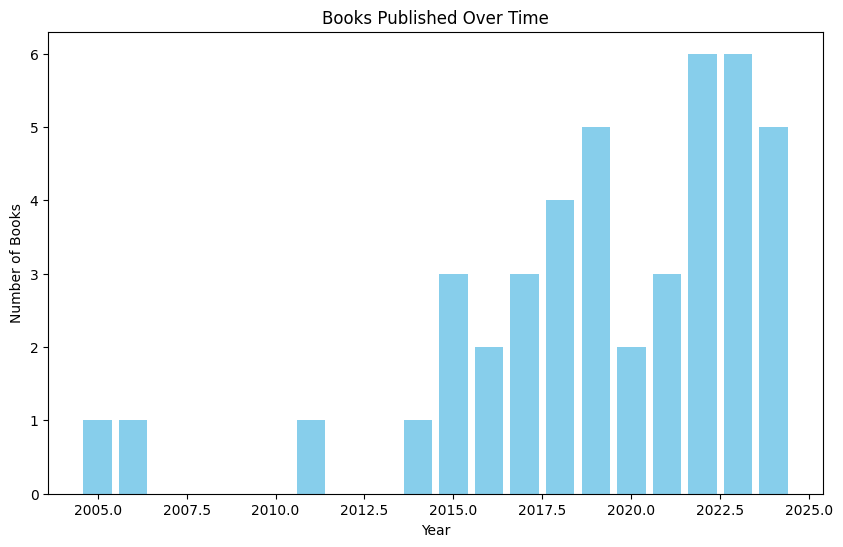

In [52]:
publication_trends = df.groupby('Year').size()
plt.figure(figsize=(10, 6))
plt.bar(publication_trends.index, publication_trends.values, color='skyblue')
plt.title('Books Published Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.show()


In [54]:
df.head()

,Rank,Title,Author,Rating,Number of Reviews,Cover Type,Date,Price,Year,Revenue Estimate
0,1,Don't Believe Everything You Think (English),Joseph Nguyen,4.5,8256,Paperback,2022-11-25,235.0,2022,1940160.0
1,2,Atomic Habits,James Clear,4.6,98803,Paperback,2018-10-30,549.0,2018,54242847.0
2,3,The Power of Your Subconscious Mind: Original ...,Joseph Murphy,4.4,13457,Paperback,2020-10-12,149.0,2020,2005093.0
3,4,The Psychology of Money,Morgan Housel,4.6,67673,Paperback,2020-09-18,312.0,2020,21113976.0
4,5,I Don't Love You Anymore: Moving On and Living...,Rithvik Singh,4.1,740,Paperback,2024-05-14,204.0,2024,150960.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 0 to 47
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Rank               43 non-null     int64         
 1   Title              43 non-null     object        
 2   Author             43 non-null     object        
 3   Rating             43 non-null     float64       
 4   Number of Reviews  43 non-null     int64         
 5   Cover Type         43 non-null     object        
 6   Date               43 non-null     datetime64[ns]
 7   Price              43 non-null     float64       
 8   Year               43 non-null     int32         
 9   Revenue Estimate   43 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), object(3)
memory usage: 3.5+ KB


# Since features like Price, Rating, and Number of Reviews vary in scale, apply normalization or standardization to improve model performance:


In [56]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Rating', 'Number of Reviews', 'Price']] = scaler.fit_transform(df[['Rating', 'Number of Reviews', 'Price']])


#Convert Cover Type and Author into numeric format using one-hot encoding or label encoding: -->

In [57]:
df = pd.get_dummies(df, columns=['Cover Type'], drop_first=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Author'] = le.fit_transform(df['Author'])


#Apply log transformation to highly skewed features, such as Number of Reviews or Revenue Estimate, to make their distribution more normal:

In [58]:
import numpy as np
df['Number of Reviews'] = np.log1p(df['Number of Reviews'])
df['Revenue Estimate'] = np.log1p(df['Revenue Estimate'])  # Only if the target is highly skewed


In [59]:
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter


In [60]:
df['Price_Rating'] = df['Price'] * df['Rating']
df['Price_Reviews'] = df['Price'] * df['Number of Reviews']


In [61]:
df.head()

,Rank,Title,Author,Rating,Number of Reviews,Date,Price,Year,Revenue Estimate,Cover Type_Kindle Edition,Cover Type_Paperback,Month,Quarter,Price_Rating,Price_Reviews
0,1,Don't Believe Everything You Think (English),14,0.293412,-0.890744,2022-11-25,-0.505556,2022,14.478282,False,True,11,4,-0.148336,0.450321
1,2,Atomic Habits,12,0.866898,0.443319,2018-10-30,1.337321,2018,17.808982,False,True,10,4,1.159320,0.592859
2,3,The Power of Your Subconscious Mind: Original ...,13,-0.280075,-0.741784,2020-10-12,-1.010293,2020,14.511202,False,True,10,4,0.282957,0.749419
3,4,The Psychology of Money,17,0.866898,0.151306,2020-09-18,-0.053640,2020,16.865446,False,True,9,3,-0.046501,-0.008116
4,5,I Don't Love You Anymore: Moving On and Living...,24,-2.000534,-1.154869,2024-05-14,-0.687496,2024,11.924777,False,True,5,2,1.375358,0.793968


In [62]:
print(df.dtypes)


Rank                                  int64
Title                                object
Author                                int64
Rating                              float64
Number of Reviews                   float64
Date                         datetime64[ns]
Price                               float64
Year                                  int32
Revenue Estimate                    float64
Cover Type_Kindle Edition              bool
Cover Type_Paperback                   bool
Month                                 int32
Quarter                               int32
Price_Rating                        float64
Price_Reviews                       float64
dtype: object


In [64]:
df = df.drop(columns=['Title', 'Author', 'Rank', 'Date'])


In [65]:
df.head()

,Rating,Number of Reviews,Price,Year,Revenue Estimate,Cover Type_Kindle Edition,Cover Type_Paperback,Month,Quarter,Price_Rating,Price_Reviews
0,0.293412,-0.890744,-0.505556,2022,14.478282,False,True,11,4,-0.148336,0.450321
1,0.866898,0.443319,1.337321,2018,17.808982,False,True,10,4,1.159320,0.592859
2,-0.280075,-0.741784,-1.010293,2020,14.511202,False,True,10,4,0.282957,0.749419
3,0.866898,0.151306,-0.053640,2020,16.865446,False,True,9,3,-0.046501,-0.008116
4,-2.000534,-1.154869,-0.687496,2024,11.924777,False,True,5,2,1.375358,0.793968


<Axes: >

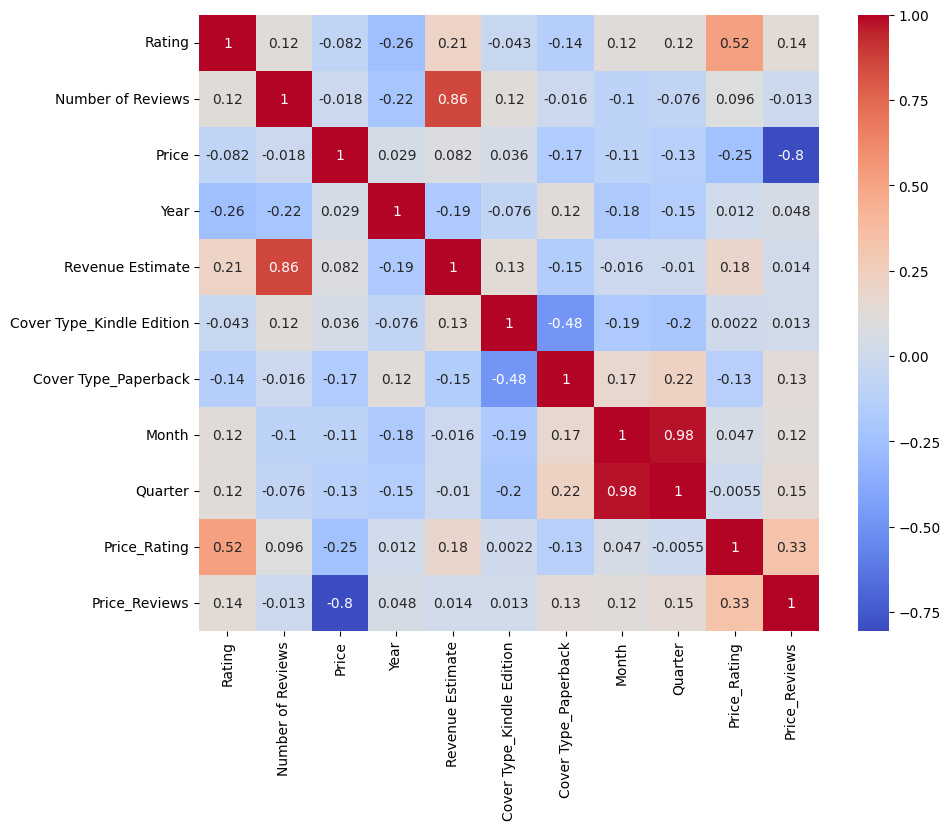

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')


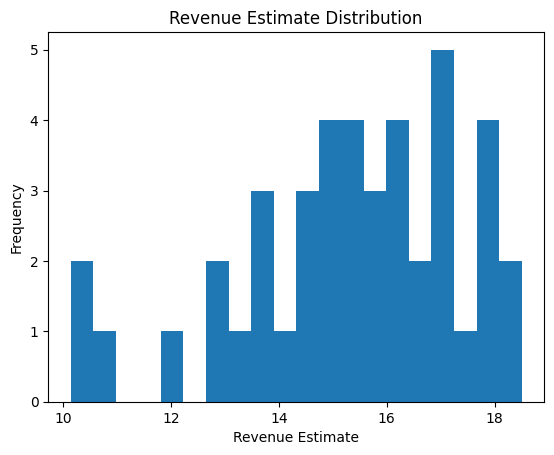

In [67]:
import matplotlib.pyplot as plt

plt.hist(df['Revenue Estimate'], bins=20)
plt.title('Revenue Estimate Distribution')
plt.xlabel('Revenue Estimate')
plt.ylabel('Frequency')
plt.show()


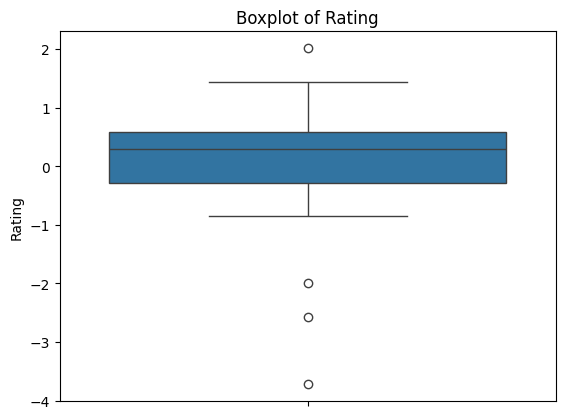

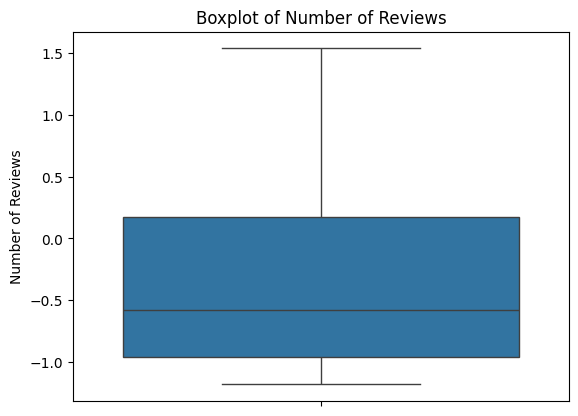

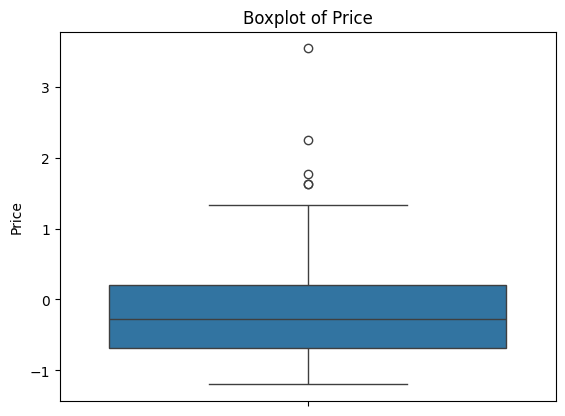

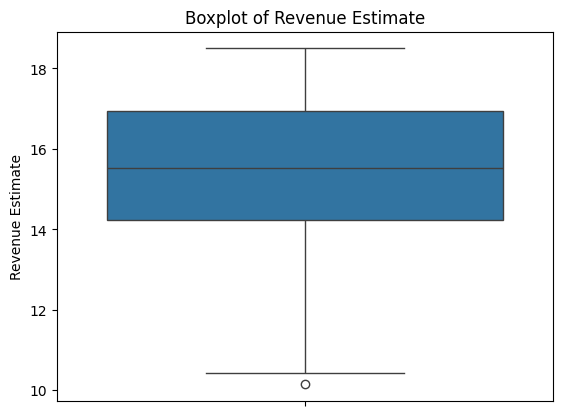

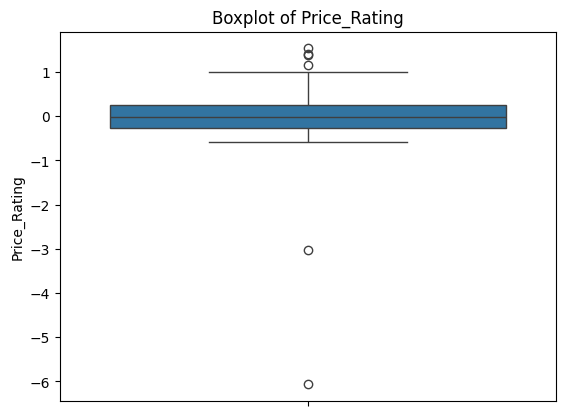

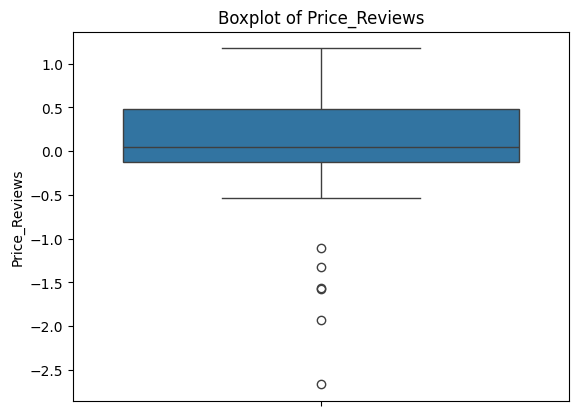

In [69]:
import matplotlib.pyplot as plt
numerical_cols = ['Rating', 'Number of Reviews', 'Price', 'Revenue Estimate', 'Price_Rating', 'Price_Reviews']
for col in numerical_cols:
    plt.figure()
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [70]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"{col}:")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Number of Outliers: {len(outliers)}")
    print(outliers[col].values, "\n")


Rating:
Lower Bound: -1.570418834207798, Upper Bound: 1.8704988662220146
Number of Outliers: 4
[-2.00053355  2.01387044 -2.57401983 -3.7209924 ] 

Number of Reviews:
Lower Bound: -2.6574314226852165, Upper Bound: 1.8642389627637925
Number of Outliers: 0
[] 

Price:
Lower Bound: -1.9948228372100298, Upper Bound: 1.5148587923220482
Number of Outliers: 5
[1.63077219 1.77162898 2.25288967 1.63077219 3.54407689] 

Revenue Estimate:
Lower Bound: 10.160311343628845, Upper Bound: 21.006928015831978
Number of Outliers: 1
[10.14175614] 

Price_Rating:
Lower Bound: -1.0587679053722936, Upper Bound: 1.0269383393120122
Number of Outliers: 6
[ 1.15932034  1.37535836  1.41371294  1.53582139 -6.06809092 -3.02508574] 

Price_Reviews:
Lower Bound: -1.0468108596171977, Upper Bound: 1.4065230057973763
Number of Outliers: 6
[-1.56502418 -1.10700696 -1.32622808 -2.66650312 -1.92652864 -1.57535971] 



In [71]:
df['Rating'] = np.where(df['Rating'] < -1.57, -1.57, df['Rating'])
df['Rating'] = np.where(df['Rating'] > 1.87, 1.87, df['Rating'])


In [72]:
df['Price'] = np.where(df['Price'] < -1.99, -1.99, df['Price'])
df['Price'] = np.where(df['Price'] > 1.51, 1.51, df['Price'])


In [73]:
df['Revenue Estimate'] = np.where(df['Revenue Estimate'] < 10.16, 10.16, df['Revenue Estimate'])
df['Revenue Estimate'] = np.where(df['Revenue Estimate'] > 21.01, 21.01, df['Revenue Estimate'])


In [75]:
df['Price_Rating'] = np.where(df['Price_Rating'] < -1.05, -1.05, df['Price_Rating'])
df['Price_Rating'] = np.where(df['Price_Rating'] > 1.03, 1.03, df['Price_Rating'])


In [76]:
df['Price_Reviews'] = np.where(df['Price_Reviews'] < -1.05, -1.05, df['Price_Reviews'])
df['Price_Reviews'] = np.where(df['Price_Reviews'] > 1.41, 1.41, df['Price_Reviews'])


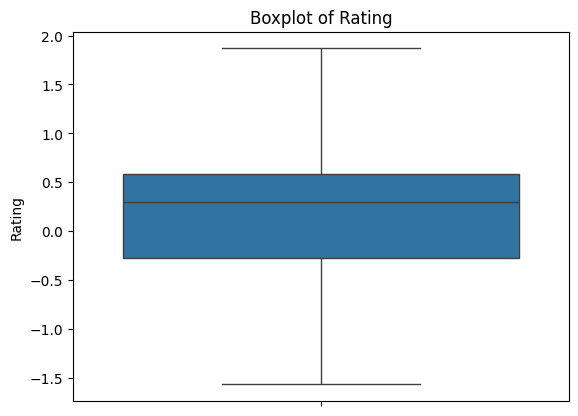

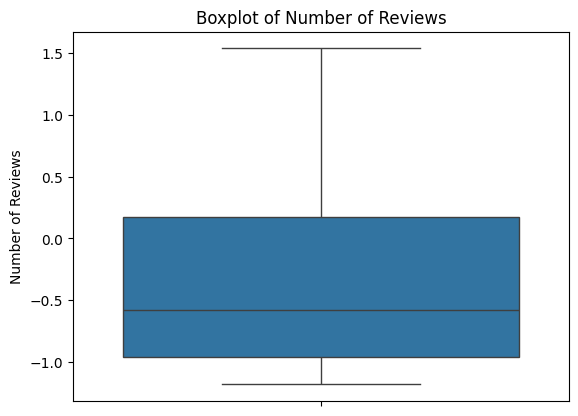

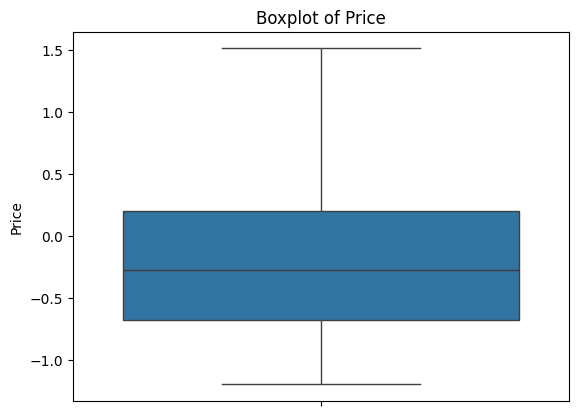

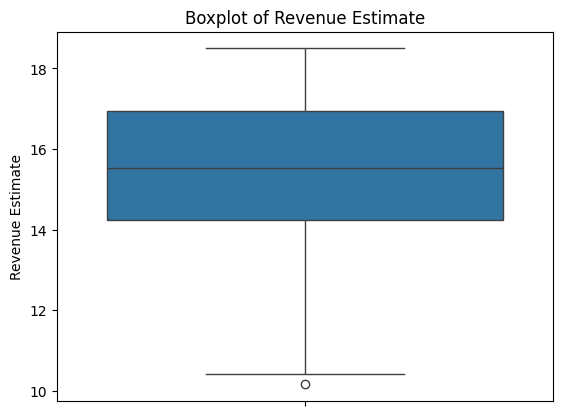

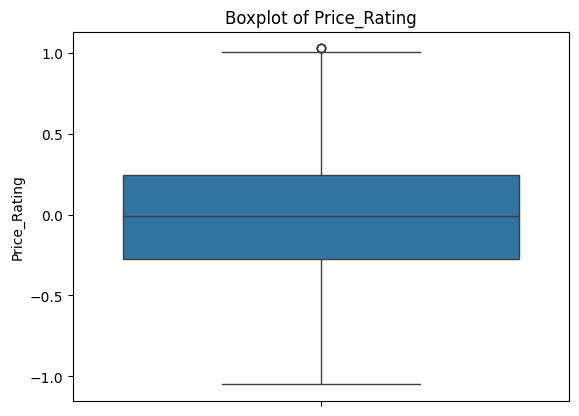

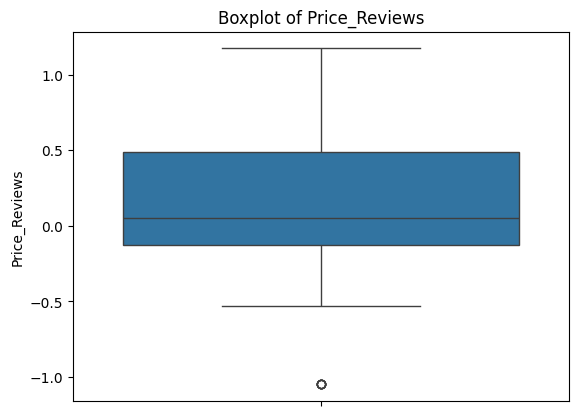

In [77]:
numerical_cols = ['Rating', 'Number of Reviews', 'Price', 'Revenue Estimate', 'Price_Rating', 'Price_Reviews']
for col in numerical_cols:
    plt.figure()
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [78]:
df.head()

,Rating,Number of Reviews,Price,Year,Revenue Estimate,Cover Type_Kindle Edition,Cover Type_Paperback,Month,Quarter,Price_Rating,Price_Reviews
0,0.293412,-0.890744,-0.505556,2022,14.478282,False,True,11,4,-0.148336,0.450321
1,0.866898,0.443319,1.337321,2018,17.808982,False,True,10,4,1.030000,0.592859
2,-0.280075,-0.741784,-1.010293,2020,14.511202,False,True,10,4,0.282957,0.749419
3,0.866898,0.151306,-0.053640,2020,16.865446,False,True,9,3,-0.046501,-0.008116
4,-1.570000,-1.154869,-0.687496,2024,11.924777,False,True,5,2,1.030000,0.793968


In [79]:
X = df.drop(columns=['Revenue Estimate'])  # Exclude target variable
y = df['Revenue Estimate']

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_reg = lin_reg.predict(X_test)
lin_reg_score = lin_reg.score(X_test, y_test)

In [82]:
print(f"Linear Regression R-squared: {lin_reg_score}")

Linear Regression R-squared: 0.4936082105028936


In [83]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf_reg = rf_reg.predict(X_test)
rf_reg_score = rf_reg.score(X_test, y_test)

In [84]:
print(f"Random Forest Regressor R-squared: {rf_reg_score}")

Random Forest Regressor R-squared: 0.9257355914752119


In [85]:
# Gradient Boosting Regressor (or XGBoost)
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_gb_reg = gb_reg.predict(X_test)
gb_reg_score = gb_reg.score(X_test, y_test)

In [86]:
print(f"Gradient Boosting Regressor R-squared: {gb_reg_score}")

Gradient Boosting Regressor R-squared: 0.9713695459903895
